# Test Interpolators
Brendan Smithyman | March, 2016

In [1]:
import sys
import warnings
sys.path.append('../..')

In [2]:
from zephyr.backend import SplineGridInterpolator
from zephyr.middleware import FullwvDatastore

## Setup

Read a configuration from `xhlayr.ini` and `xhlayr.vp`, and set up a scale factor of 1.5; i.e., $sdx = 1.5\times dx$.

In [3]:
fds = FullwvDatastore('xhlayr')
systemConfig = fds.systemConfig
scu = {
    'scale': 1.5,
}
systemConfig.update(scu)

Create a `SplineGridInterpolator`, which behaves like an $8911\times 20000$ matrix.

In [4]:
sgi = SplineGridInterpolator(systemConfig)
print(sgi.shape)

(8911.0, 20000)


Get the velocity `c` from the `systemConfig`, downsample it to create `cn`, and then apply the transpose of the operation to get `cr`.

In [5]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    
    c = systemConfig['c']
    cn = (sgi * c).reshape((sgi.snz, sgi.snx))
    cr = (sgi.T * cn).reshape((sgi.nz, sgi.nx))

## Results

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/brendan/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


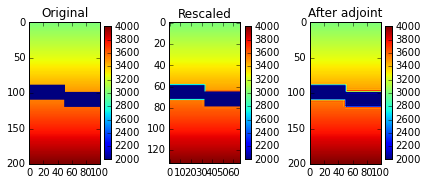

In [7]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    

    plotOpts = {
        'vmin': c.min(),
        'vmax': c.max(),
    }

    subplot(1,3,1)
    imshow(c, **plotOpts)
    colorbar(shrink=0.5)
    title('Original')

    subplot(1,3,2)
    imshow(cn, **plotOpts)
    colorbar(shrink=0.5)
    title('Rescaled')

    subplot(1,3,3)
    imshow(cr, **plotOpts)
    colorbar(shrink=0.5)
    title('After adjoint')

    tight_layout()

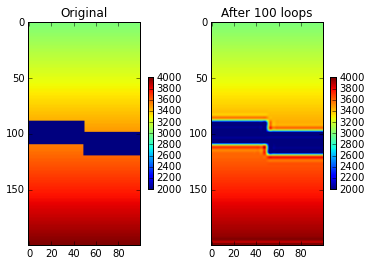

In [8]:
nLoops = 100

ca = c
sgiT = sgi.T
for i in xrange(nLoops):
    cb = sgi*ca
    ca = sgiT*cb
ca.shape = (sgi.nz,sgi.nx)

plotOpts = {
    'vmin': c.min(),
    'vmax': c.max(),
}

subplot(1,2,1)
imshow(c, **plotOpts)
colorbar(shrink=0.5)
title('Original')

subplot(1,2,2)
imshow(ca, **plotOpts)
colorbar(shrink=0.5)
title('After %d loops'%nLoops)